# Tutorial 1 Pytorch

import and install packages:

In [ ]:
!pip install torch torchvision

In [ ]:
import torch

If you are using google COLAB for free GPU, please Select Runtime-> Change Runtime type -> select runtime python 3 and hardward accelerator GPU

For your personal laptop, if your laptop has Nvidia GPU, please use __below cell__, A PyTorch device object is created, designated as GPU. This means that the tensor or model created next will be computed on the GPU.

In [ ]:
device = torch.device("cuda")

In [ ]:
# Check if a GPU is available
if torch.cuda.is_available():
    # If there is a GPU, set the device to GPU
    device = torch.device("cuda")
    print("GPU avaliable")
else:
    # If there is no GPU, set the device to CPU
    device = torch.device("cpu")
    print("No Found GPU")

GPU avaliable


Let’s see a few basic tensor manipulations. First, just a few of the
ways to create tensors:

In [ ]:
# Create a scalar (0-dimensional tensor)
scalar_tensor = torch.tensor(3.14)

# Create a vector (1D tensor)
vector_tensor = torch.tensor([1, 2, 3])

# Create a matrix (2D tensor)
matrix_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Randomly initialize a tensor
random_tensor = torch.rand(3, 3)
print(random_tensor)
print(random_tensor.dtype)

tensor([[0.2110, 0.4626, 0.0305],
        [0.7761, 0.8329, 0.3624],
        [0.0708, 0.2111, 0.0425]])
torch.float32


In [ ]:
three_dimensional_tensor = torch.tensor([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
                                         [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])

print(three_dimensional_tensor)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])


Below, we create a 5x3 matrix filled with ones, and query its datatype
to find out that the zeros are 32-bit floating point numbers, which is
the default PyTorch.

What if you wanted integers instead? You can always override the
default:

In [ ]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


You can see that when we do change the default, the tensor helpfully
reports this when printed.

It’s common to initialize learning weights randomly, often with a
specific seed for the PRNG (虛擬亂數產生器 (Pseudorandom number generator)) for reproducibility of results:

计算机并不能产生真正的随机数，而是已经编写好的一些无规则排列的数字存储在电脑里，把这些数字划分为若干相等的N份，并为每份加上一个编号，编号固定的时候，获得的随机数也是固定的。
在神经网络中，参数默认是进行随机初始化的。如果不设置的话每次训练时的初始化都是随机的，导致结果不确定。如果设置初始化，则训练时的每次初始化都是固定的。

In [ ]:
torch.manual_seed(1729) #Sets the seed for generating random numbers on all devices.
r1 = torch.rand(2, 2)
print('R1:A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

R1:A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


Tensors of similar shapes may be added, multiplied, etc. Operations with scalars
are distributed over the tensor:


In [ ]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


Attributes of a Tensor

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
if torch.cuda.is_available():
   tensor = tensor.to("cuda:0")

# now check the tensor device
print("Device tensor is stored on:", tensor.device)

Device tensor is stored on: cuda:0


Here’s a small sample of the mathematical operations available:

In [ ]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.1770,  0.3677],
        [-0.8595,  0.0210]])

Absolute value of r:
tensor([[0.1770, 0.3677],
        [0.8595, 0.0210]])

Inverse sine of r:
tensor([[-0.1780,  0.3766],
        [-1.0343,  0.0210]])

Determinant of r:
tensor(0.3123)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.2519, -0.9677],
        [-0.9677,  0.2519]]),
S=tensor([0.8836, 0.3535]),
V=tensor([[ 0.9918, -0.1279],
        [-0.1279, -0.9918]]))

Average and standard deviation of r:
(tensor(0.5167), tensor(-0.1619))

Maximum value of r:
tensor(0.3677)


## Tensor to NumPy array

In [ ]:
import numpy as np

In [ ]:
t = torch.ones(5)
print(f"t: {t}")

t: tensor([1., 1., 1., 1., 1.])


In [ ]:
n = t.numpy()
print(f"n: {n}")

n: [1. 1. 1. 1. 1.]


In [ ]:
#A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor

In [ ]:
n = np.ones(5)
print(f"t: {n}")

t: [1. 1. 1. 1. 1.]


In [ ]:
t = torch.from_numpy(n)

print(f"n: {t}")

n: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Differentiation in Autograd
Let's take a look at how ``autograd`` collects gradients. We create two tensors ``a`` and ``b`` with
``requires_grad=True``. This signals to ``autograd`` that every operation on them should be tracked.

In [ ]:
# Create a tensor and set requires_grad to True
x = torch.tensor([3.0], requires_grad=True)
x
print(x.grad)

None


In [ ]:
# define one tensor
y = x**2

# Calculate the gradient of y with respect to x
y.backward()

# print gradents
print(x.grad)

tensor([6.])


In [ ]:
# print gradents
print(6 == x.grad)

tensor([True])


In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor ``Q`` from ``a`` and ``b``.

\begin{align}Q = 3a^3 - b^2\end{align}

In [ ]:
Q = 3*a**3 - b**2

Let's assume ``a`` and ``b`` to be parameters of an NN, and ``Q``
to be the error. In NN training, we want gradients of the error
w.r.t. parameters, i.e.

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}


When we call ``.backward()`` on ``Q``, autograd calculates these gradients
and stores them in the respective tensors' ``.grad`` attribute.

We need to explicitly pass a ``gradient`` argument in ``Q.backward()`` because it is a vector.
``gradient`` is a tensor of the same shape as ``Q``, and it represents the
gradient of Q w.r.t. itself, i.e.

\begin{align}\frac{dQ}{dQ} = 1\end{align}

Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like ``Q.sum().backward()``

In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [ ]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [ ]:
9*a**2

tensor([36., 81.], grad_fn=<MulBackward0>)

Gradients are now deposited in ``a.grad`` and ``b.grad``


##_Backpropagation_,
short for "backward propagation of errors," is an algorithm for supervised learning of artificial neural networks using gradient descent. Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights.

# Example: How does grad be used in  Nerual Network

We use the model's prediction and the corresponding label to calculate the error (loss). The next step is to backpropagate this error through the network. Backward propagation is kicked off when we call .backward() on the error tensor. Autograd then calculates and stores the gradients for each model parameter in the parameter's .grad attribute.

In [ ]:
import torch.nn as nn
import torch.optim as optim

# define a simple NN
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create models, loss functions and optimizers
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# input and target
inputs = torch.tensor([[1.0, 2.0]], requires_grad=True) #2D tensor
targets = torch.tensor([[0.0]], requires_grad=False)

# Train loop
for epoch in range(100):
    # forward propagation
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backpropagation and optimization
    optimizer.zero_grad()
    #Before performing backpropagation, the gradients need to be cleared.
    #PyTorch will increase the gradient value at each gradient accumulation,

    loss.backward()
    #The gradient of the model parameters with respect to the loss is automatically calculated.

    optimizer.step()
    #Perform a one-step gradient descent algorithm, update the weights of the model based on the calculated gradient to reduce the loss.

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item()}')

# print result
for name, param in model.named_parameters():
    print(f'Parameter {name}: {param.data}')

Epoch [10/100], Loss: 0.0254683755338192
Epoch [20/100], Loss: 0.005316497758030891
Epoch [30/100], Loss: 0.0010994839249178767
Epoch [40/100], Loss: 0.0002257991291116923
Epoch [50/100], Loss: 4.619911851477809e-05
Epoch [60/100], Loss: 9.435588253836613e-06
Epoch [70/100], Loss: 1.9255057850386947e-06
Epoch [80/100], Loss: 3.9279726138374826e-07
Epoch [90/100], Loss: 8.01243515979877e-08
Epoch [100/100], Loss: 1.6344220199471238e-08
Parameter fc1.weight: tensor([[ 0.6642, -0.3039],
        [-0.4272, -0.2365],
        [ 0.1587,  0.1347],
        [-0.0118,  0.5944],
        [ 0.5261,  0.0474]])
Parameter fc1.bias: tensor([ 0.2985, -0.1960,  0.2079, -0.3484, -0.0245])
Parameter fc2.weight: tensor([[-0.4192, -0.2661,  0.0102,  0.1217, -0.1319]])
Parameter fc2.bias: tensor([0.1202])


#Creat your neural network

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv') #https://github.com/plotly/datasets/blob/master/diabetes.csv
X = dataset.iloc[:, :8]
y = dataset.iloc[:, -1]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Input Variables (
):

1. Number of times pregnant

2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test

3. Diastolic blood pressure (mm Hg)

4. Triceps skin fold thickness (mm)

5. 2-hour serum insulin (μIU/ml)

6. Body mass index (weight in kg/(height in m)2)

7. Diabetes pedigree function

8. Age (years)

Output Variables (
):

9. Class label (0 or 1)

## To convert, create a tensor out of NumPy arrays:



In [ ]:
X = torch.tensor(X.to_numpy(), dtype=torch.float32)
y = torch.tensor(y.to_numpy(), dtype=torch.float32).reshape(-1, 1)

# **Fully Connected Feedforward Neural Network (FCNN)**

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid())


print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


## You can piece it all together by adding each layer such that:

1. The model expects rows of data with 8 variables (the first argument at the first layer set to 8)
2. The first hidden layer has 12 neurons, followed by a ReLU activation function
3. The second hidden layer has 8 neurons, followed by another ReLU activation function
4. The output layer has one neuron, followed by a sigmoid activation function

## But note that, in PyTorch, there is a more verbose way of creating a model. The model above can be created as a Python class inherited from the __nn.Module__:

In [ ]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


# Preparation for Training

In [ ]:
loss_fn = nn.BCELoss()  # binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

##### The size of a batch is limited by the system’s memory. Also, the number of computations required is linearly proportional to the size of a batch. The total number of batches over many epochs is how many times you run the gradient descent to refine the model. It is a trade-off that you want more iterations for the gradient descent so you can produce a better model, but at the same time, you do not want the training to take too long to complete. The number of epochs and the size of a batch can be chosen experimentally by trial and error.

In [ ]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()#Before performing backpropagation, the gradients need to be cleared. If you don't clear the gradients using,
        #they will keep accumulating, which can lead to incorrect gradient updates and ultimately incorrect model training.
        loss.backward() #The gradient of the model parameters with respect to the loss is automatically calculated.
        optimizer.step() #update the weights of the model based on the calculated gradient to reduce the loss.
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.6301608681678772
Finished epoch 1, latest loss 0.6306412220001221
Finished epoch 2, latest loss 0.6185063123703003
Finished epoch 3, latest loss 0.6054702997207642
Finished epoch 4, latest loss 0.56596839427948
Finished epoch 5, latest loss 0.5237097144126892
Finished epoch 6, latest loss 0.5123329162597656
Finished epoch 7, latest loss 0.5074543356895447
Finished epoch 8, latest loss 0.49241214990615845
Finished epoch 9, latest loss 0.5107022523880005
Finished epoch 10, latest loss 0.5144428014755249
Finished epoch 11, latest loss 0.5222078561782837
Finished epoch 12, latest loss 0.5249902606010437
Finished epoch 13, latest loss 0.5273944735527039
Finished epoch 14, latest loss 0.5290479063987732
Finished epoch 15, latest loss 0.5288922190666199
Finished epoch 16, latest loss 0.5350523591041565
Finished epoch 17, latest loss 0.5395850539207458
Finished epoch 18, latest loss 0.5385274887084961
Finished epoch 19, latest loss 0.5426692366600037
Finished ep

# Evaluate the Model

#### You can evaluate your model on your training dataset in the same way you invoked the model in training. This will generate predictions for each input, but then you still need to compute a score for the evaluation. This score can be the same as your loss function or something different. Because you are doing binary classification

In [ ]:
with torch.no_grad():
    y_pred = model(X)

accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7786458134651184


The round() function rounds off the floating point to the nearest integer. The == operator compares and returns a Boolean tensor, which can be converted to floating point numbers 1.0 and 0.0. The mean() function will provide you the count of the number of 1’s (i.e., prediction matches the label) divided by the total number of samples.

In [ ]:
y_pred.round() == y.float()

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True

In [ ]:
# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (expected 1)


# Image classification

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Let us show some of the training images, for fun.



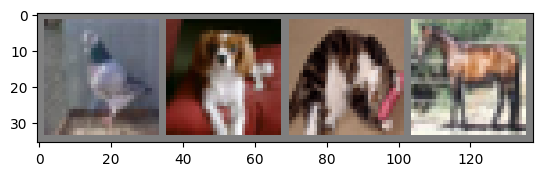

bird  dog   cat   horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

###  Define a Convolutional Neural Network

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.216
[1,  4000] loss: 1.831
[1,  6000] loss: 1.679
[1,  8000] loss: 1.566
[1, 10000] loss: 1.518
[1, 12000] loss: 1.491
[2,  2000] loss: 1.403
[2,  4000] loss: 1.364
[2,  6000] loss: 1.346
[2,  8000] loss: 1.339
[2, 10000] loss: 1.300
[2, 12000] loss: 1.312
Finished Training


### Test the network on the test data

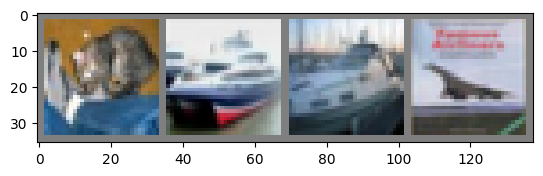

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))